In [1]:
import numpy as np
import scipy
import pandas
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
sns.set_style('ticks')
sns.set_context('notebook')
import h5py
import allel; print('scikit-allel', allel.__version__)

scikit-allel 1.2.1


In [2]:
allel.vcf_to_hdf5('/wrk/Gen_Tree/GenTree_Genome_mapping/Picea_abies/Pabies_GM_Oulu_filtered_v1.vcf', '/wrk/Gen_Tree/GenTree_Genome_mapping/Picea_abies/Pabies_GM_Oulu_filtered_v1.h5', fields='*', overwrite=True)

In [3]:
callset_fn = '/wrk/Gen_Tree/GenTree_Genome_mapping/Picea_abies/Pabies_GM_Oulu_filtered_v1.h5'
callset = h5py.File(callset_fn, mode='r')
callset

<HDF5 file "Pabies_GM_Oulu_filtered_v1.h5" (mode r)>

In [4]:
sorted(callset.keys())

['calldata', 'samples', 'variants']

In [5]:
calldata = callset['calldata']

In [6]:
calldata

<HDF5 group "/calldata" (10 members)>

In [7]:
list(calldata)

['AD', 'DP', 'GQ', 'GT', 'MIN_DP', 'PGT', 'PID', 'PL', 'RGQ', 'SB']

In [8]:
variants = callset['variants']
variants

<HDF5 group "/variants" (36 members)>

In [9]:
variants = allel.VariantChunkedTable(callset['variants'], 
                                     names=['POS', 'REF', 'ALT', 'DP', 'QUAL', 'AN', 'MQ', 'QD', 'SOR', 'MQRankSum', 'ReadPosRankSum', 'numalt'])
variants

<VariantChunkedTable shape=(589660,) dtype=[('POS', '<i4'), ('REF', 'O'), ('ALT', 'O', (3,)), ('DP', '<i4'), ('QUAL', '<f4'), ('AN', '<i4'), ('MQ', '<f4'), ('QD', '<f4'), ('SOR', '<f4'), ('MQRankSum', '<f4'), ('ReadPosRankSum', '<f4'), ('numalt', '<i4')]
   nbytes=40.5M cbytes=14.5M cratio=2.8
   values=h5py._hl.group.Group>

In [10]:
calldata = callset['calldata']
calldata

<HDF5 group "/calldata" (10 members)>

In [11]:
list(calldata.keys())

['AD', 'DP', 'GQ', 'GT', 'MIN_DP', 'PGT', 'PID', 'PL', 'RGQ', 'SB']

In [12]:
genotypes = allel.GenotypeChunkedArray(calldata['GT'])
genotypes

<GenotypeChunkedArray shape=(589660, 606, 2) dtype=int8 chunks=(65536, 64, 2)
   nbytes=681.6M cbytes=52.8M cratio=12.9
   compression=gzip compression_opts=1
   values=h5py._hl.dataset.Dataset>

In [13]:
def plot_variant_hist(f, bins=30):
    x = variants[f][:]
    fig, ax = plt.subplots(figsize=(7, 5))
    sns.despine(ax=ax, offset=10)
    ax.hist(x, bins=bins)
    ax.set_xlabel(f)
    ax.set_ylabel('No. variants')
    ax.set_title('Variant %s distribution' % f)

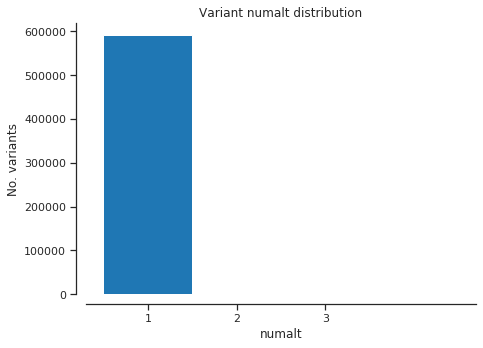

In [14]:
plot_variant_hist('numalt', bins=np.arange(0.5, 5.5, 1))
plt.gca().set_xticks([1,2,3])

/wrk/Programs/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/wrk/Programs/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


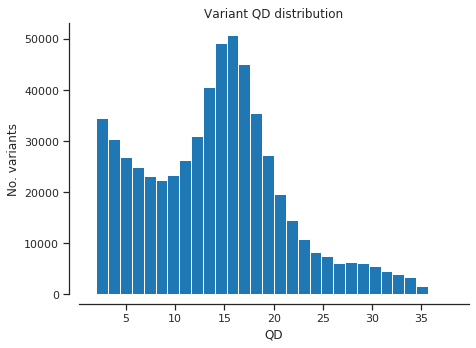

In [15]:
plot_variant_hist('QD')

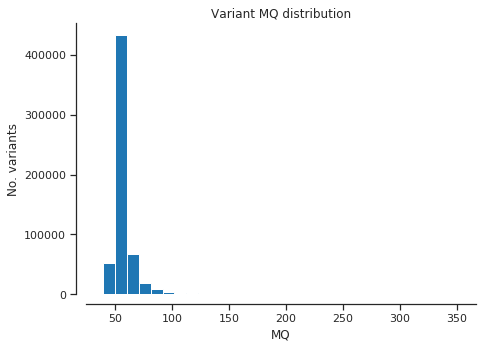

In [16]:
plot_variant_hist('MQ')

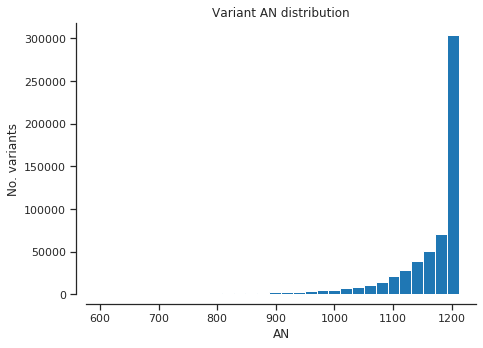

In [17]:
plot_variant_hist('AN')

In [18]:
samples_fn = '/wrk/Gen_Tree/GenTree_Genome_mapping/Picea_abies/Pabies_SAMPLES_kept.txt'
samples = pandas.read_csv(samples_fn, sep='\t')
samples

,ID,Population
0,AT_PA_05_01,AT_PA_5
1,AT_PA_05_02,AT_PA_5
2,AT_PA_05_04,AT_PA_5
3,AT_PA_05_05,AT_PA_5
4,AT_PA_05_06,AT_PA_5
...,...,...
601,SE_PA_16_21,SE_PA_16
602,SE_PA_16_22,SE_PA_16
603,SE_PA_16_23,SE_PA_16
604,SE_PA_16_24,SE_PA_16


In [19]:
samples.Population.value_counts()

LT_PA_11    25
CH_PA_2     25
NO_PA_22    25
GR_PA_8     25
RU_PA_19    25
NO_PA_13    25
AT_PA_6     25
IT_PA_4     25
FR_PA_21    25
SE_PA_15    25
RU_PA_20    25
GE_PA_9     25
LT_PA_12    25
GE_PA_10    25
FI_PA_17    24
GR_PA_7     24
PL_PA_25    24
NO_PA_14    24
FI_PA_18    24
CH_PA_1     24
SE_PA_16    24
AT_PA_5     23
RO_PA_24    23
IT_PA_3     23
RU_PA_26    10
Obovata      6
Obavata      3
Name: Population, dtype: int64

In [20]:
#sample_selection = samples.Population.isin({'SE-BP-18', 'FR-BP-04', 'IT-BP-07', 'GB-BP-14', 'FI-BP-19', 'CH-BP-06', 'ES-BP-02', 'SE-BP-17', 'NO-BP-15', 'FR-BP-03', 'DE-BP-10', 'FI-BP-20', 'LT-BP-11', 'FR-BP-21', 'NO-BP-16', 'IT-BP-08', 'CH-BP-05', 'LT-BP-12', 'DE-BP-09', 'GB-BP-13'}).values
#sample_selection[:5]

In [20]:
ac = genotypes.count_alleles()
ac

<AlleleCountsChunkedArray shape=(589660, 2) dtype=int32 chunks=(73708, 2)
   nbytes=4.5M cbytes=1.4M cratio=3.2
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [23]:
n_variants = len(genotypes)
n_variants

589660

In [25]:
pc_missing = genotypes.count_missing(axis=0)[:] * 100 / n_variants
pc_het = genotypes.count_het(axis=0)[:] * 100 / n_variants

In [26]:
samples.Population.unique()
###This identifiers come from the metadata file

array(['AT_PA_5', 'AT_PA_6', 'CH_PA_1', 'CH_PA_2', 'FI_PA_17', 'FI_PA_18',
       'FR_PA_21', 'GE_PA_9', 'GE_PA_10', 'GR_PA_7', 'GR_PA_8', 'IT_PA_3',
       'IT_PA_4', 'LT_PA_11', 'LT_PA_12', 'NO_PA_13', 'NO_PA_14',
       'NO_PA_22', 'Obavata', 'Obovata', 'PL_PA_25', 'RO_PA_24',
       'RU_PA_19', 'RU_PA_20', 'RU_PA_26', 'SE_PA_15', 'SE_PA_16'],
      dtype=object)

In [33]:
def plot_genotype_frequency(pc, title):
    fig, ax = plt.subplots(figsize=(24, 5))
    sns.despine(ax=ax, offset=24)
    left = np.arange(len(pc))
    palette = sns.color_palette("hls", 30)
    pop2color = {'AT_PA_5': palette[0], 
                 'AT_PA_6': palette[1], 
                 'CH_PA_1': palette[2], 
                 'CH_PA_2': palette[3], 
                 'FI_PA_17': palette[4],
                 'FI_PA_18': palette[5], 
                 'FR_PA_21': palette[6], 
                 'GE_PA_9': palette[7],
                 'GE_PA_10': palette[8],
                 'GR_PA_7': palette[9],
                 'GR_PA_8': palette[10],
                 'IT_PA_3': palette[11], 
                 'IT_PA_4': palette[12],
                 'LT_PA_11': palette[13],
                 'LT_PA_12': palette[14],
                 'NO_PA_13': palette[15],
                 'NO_PA_14': palette[16],
                 'NO_PA_22': palette[17],
                 'Obovata': palette[29],
                 'Obavata': palette[29],
                 'PL_PA_25': palette[18],
                 'RO_PA_24': palette[19],
                 'RU_PA_19': palette[23],
                 'RU_PA_20': palette[25],
                 'RU_PA_26': palette[27],
                 'SE_PA_15': palette[20],
                 'SE_PA_16': palette[21]}
    colors = [pop2color[p] for p in samples.Population]
    ax.bar(left, pc, color=colors)
    ax.set_xlim(0, len(pc))
    ax.set_xlabel('Sample index')
    ax.set_ylabel('Percent calls')
    ax.set_title(title)
    handles = [mpl.patches.Patch(color=palette[0]),
               mpl.patches.Patch(color=palette[1]),
               mpl.patches.Patch(color=palette[2]),
               mpl.patches.Patch(color=palette[3]),
               mpl.patches.Patch(color=palette[4]),
               mpl.patches.Patch(color=palette[5]),
               mpl.patches.Patch(color=palette[6]),
               mpl.patches.Patch(color=palette[7]),
               mpl.patches.Patch(color=palette[8]),
               mpl.patches.Patch(color=palette[9]),
               mpl.patches.Patch(color=palette[10]),
               mpl.patches.Patch(color=palette[11]),
               mpl.patches.Patch(color=palette[12]),
               mpl.patches.Patch(color=palette[13]),
               mpl.patches.Patch(color=palette[14]),
               mpl.patches.Patch(color=palette[15]),
               mpl.patches.Patch(color=palette[16]),
               mpl.patches.Patch(color=palette[17]),
               mpl.patches.Patch(color=palette[29]),
               mpl.patches.Patch(color=palette[29]),
               mpl.patches.Patch(color=palette[18]),
               mpl.patches.Patch(color=palette[19]),
               mpl.patches.Patch(color=palette[23]),
               mpl.patches.Patch(color=palette[25]),
               mpl.patches.Patch(color=palette[27]),
               mpl.patches.Patch(color=palette[20]),
               mpl.patches.Patch(color=palette[21])]
    ax.legend(handles=handles, labels=['AT_PA_5', 'AT_PA_6', 'CH_PA_1', 'CH_PA_2', 'FI_PA_17', 'FI_PA_18',
       'FR_PA_21', 'GE_PA_9', 'GE_PA_10', 'GR_PA_7', 'GR_PA_8', 'IT_PA_3',
       'IT_PA_4', 'LT_PA_11', 'LT_PA_12', 'NO_PA_13', 'NO_PA_14',
       'NO_PA_22', 'Obavata', 'Obovata', 'PL_PA_25', 'RO_PA_24',
       'RU_PA_19', 'RU_PA_20', 'RU_PA_26', 'SE_PA_15', 'SE_PA_16'], title='Population',
              bbox_to_anchor=(1, 1), loc='upper left')

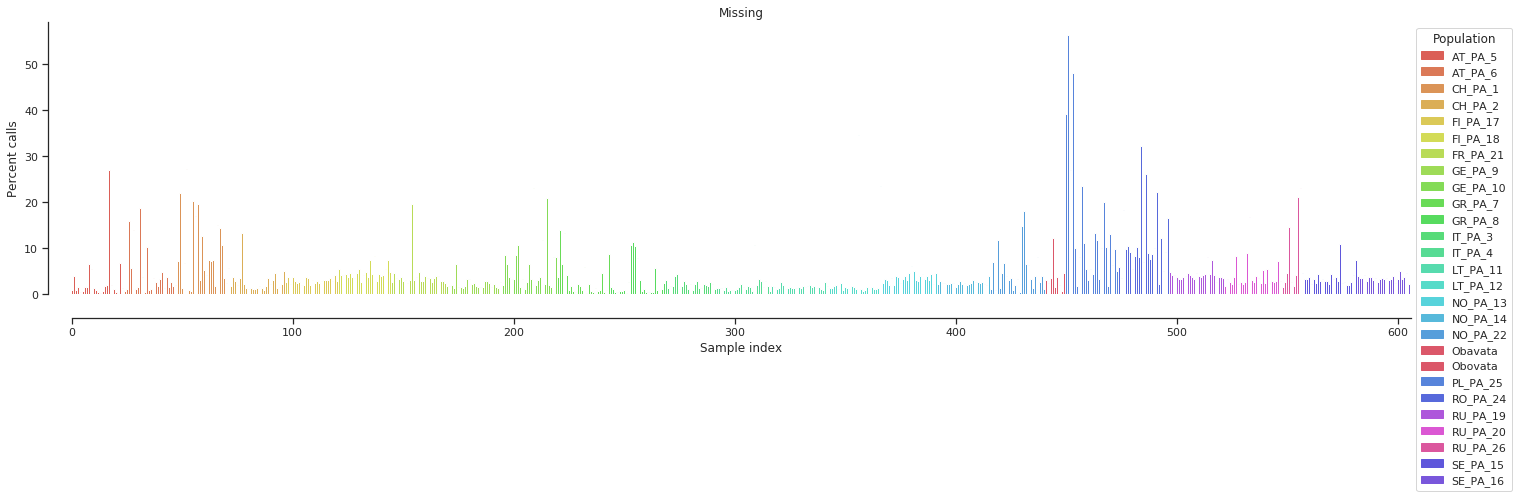

In [34]:
plot_genotype_frequency(pc_missing, 'Missing')

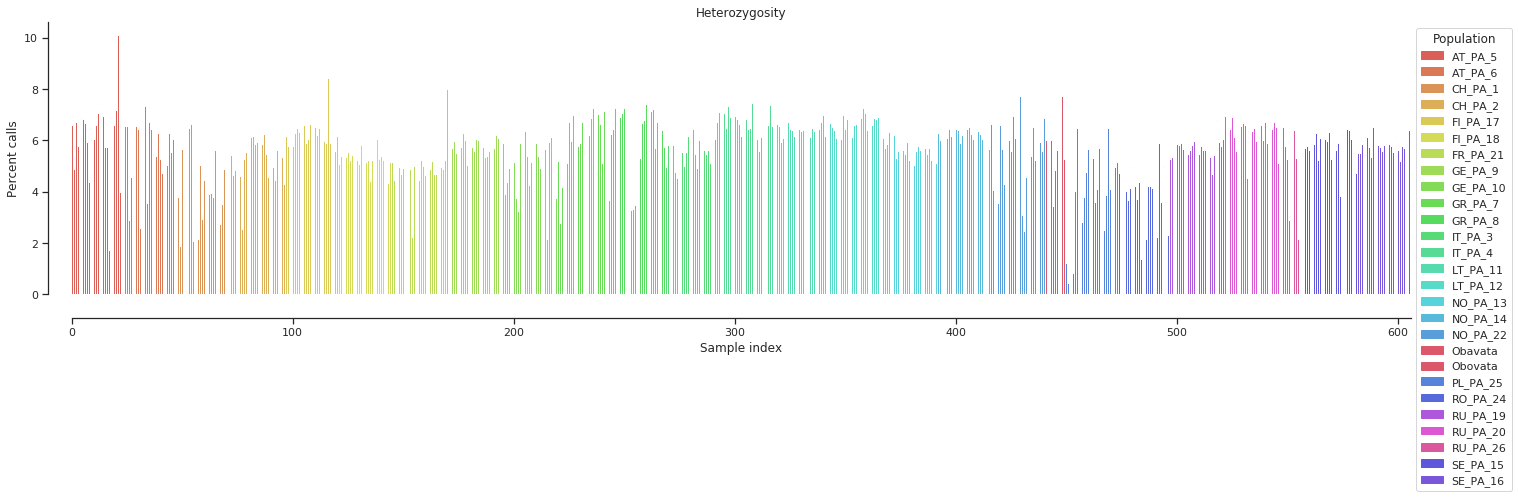

In [35]:
plot_genotype_frequency(pc_het, 'Heterozygosity')

In [36]:
samples

,ID,Population
0,AT_PA_05_01,AT_PA_5
1,AT_PA_05_02,AT_PA_5
2,AT_PA_05_04,AT_PA_5
3,AT_PA_05_05,AT_PA_5
4,AT_PA_05_06,AT_PA_5
...,...,...
601,SE_PA_16_21,SE_PA_16
602,SE_PA_16_22,SE_PA_16
603,SE_PA_16_23,SE_PA_16
604,SE_PA_16_24,SE_PA_16


In [37]:
populations = samples.Population.unique()

In [43]:
palette = sns.color_palette("hls", 35)
pop_colours = {'AT_PA_5': palette[0], 
                 'AT_PA_6': palette[1], 
                 'CH_PA_1': palette[2], 
                 'CH_PA_2': palette[3], 
                 'FI_PA_17': palette[4],
                 'FI_PA_18': palette[5], 
                 'FR_PA_21': palette[6], 
                 'GE_PA_9': palette[7],
                 'GE_PA_10': palette[8],
                 'GR_PA_7': palette[9],
                 'GR_PA_8': palette[10],
                 'IT_PA_3': palette[11], 
                 'IT_PA_4': palette[12],
                 'LT_PA_11': palette[13],
                 'LT_PA_12': palette[14],
                 'NO_PA_13': palette[15],
                 'NO_PA_14': palette[16],
                 'NO_PA_22': palette[17],
                 'Obovata': palette[29],
                 'Obavata': palette[29],
                 'PL_PA_25': palette[18],
                 'RO_PA_24': palette[19],
                 'RU_PA_19': palette[23],
                 'RU_PA_20': palette[25],
                 'RU_PA_26': palette[27],
                 'SE_PA_15': palette[20],
                 'SE_PA_16': palette[21]}

In [39]:
def plot_pca_coords(coords, model, pc1, pc2, ax, sample_population):
    sns.despine(ax=ax, offset=5)
    x = coords[:, pc1]
    y = coords[:, pc2]
    for pop in populations:
        flt = (sample_population == pop)
        ax.plot(x[flt], y[flt], marker='o', linestyle=' ', color=pop_colours[pop], 
                label=pop, markersize=6, mec='k', mew=.5)
    ax.set_xlabel('PC%s (%.1f%%)' % (pc1+1, model.explained_variance_ratio_[pc1]*100))
    ax.set_ylabel('PC%s (%.1f%%)' % (pc2+1, model.explained_variance_ratio_[pc2]*100))
    

def fig_pca(coords, model, title, sample_population=None):
    if sample_population is None:
        sample_population = samples.Population.values
    # plot coords for PCs 1 vs 2, 3 vs 4
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 2, 1)
    plot_pca_coords(coords, model, 0, 1, ax, sample_population)
    ax = fig.add_subplot(1, 2, 2)
    plot_pca_coords(coords, model, 2, 3, ax, sample_population)
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
    fig.suptitle(title, y=1.02)
    fig.tight_layout()

In [40]:
flt = (ac[:, :2].min(axis=1) > 1)
gf = genotypes.compress(flt, axis=0)
gn = gf.to_n_alt()

In [41]:
coords1, model1 = allel.pca(gn, n_components=10, scaler='patterson')

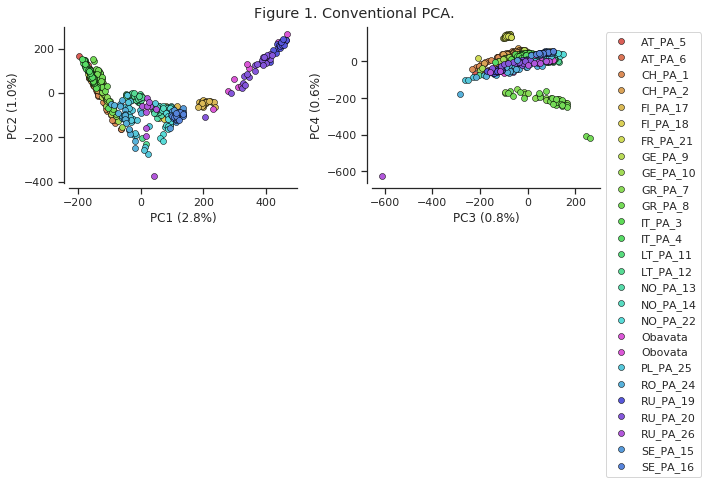

In [44]:
fig_pca(coords1, model1, 'Figure 1. Conventional PCA.')

In [48]:
weirdos = coords1[:,1]<-300
samples[weirdos]

,ID,Population
556,RU_PA_26_11,RU_PA_26
